[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sreya_code\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sreya_code\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Model Accuracy: 0.7208 (72.08%)

Classification Report:
              precision    recall  f1-score   support

       anger       0.88      0.83      0.85       540
        fear       0.86      0.69      0.76       442
         joy       0.94      0.44      0.60      1335
        love       0.69      0.92      0.79       332
     sadness       0.59      0.91      0.72      1195
    surprise       0.63      0.97      0.76       156

    accuracy                           0.72      4000
   macro avg       0.76      0.79      0.75      4000
weighted avg       0.79      0.72      0.71      4000



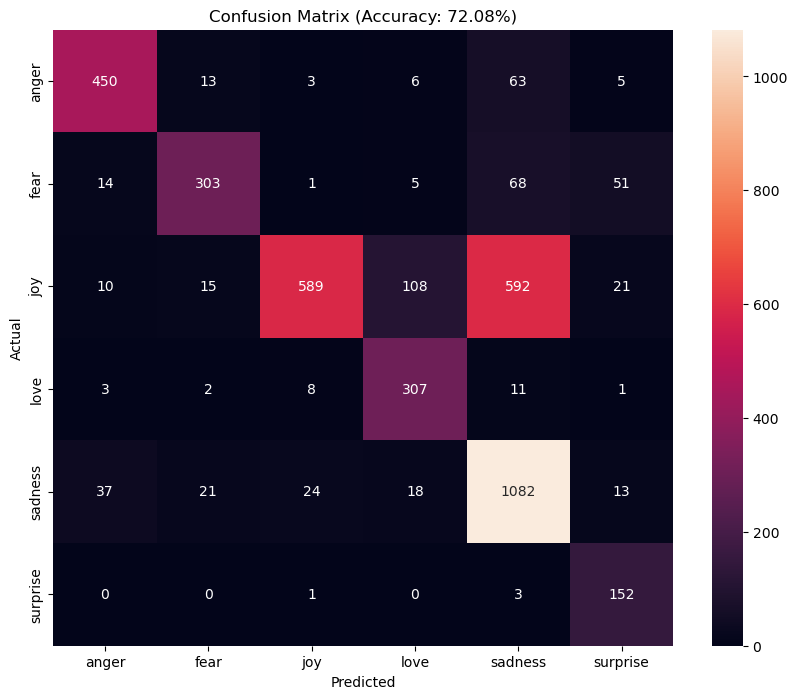

In [3]:
# emotion_classification.py
import re
import nltk
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Text preprocessing
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Data preparation
def load_data():
    train = pd.read_csv('train.txt', names=['Text', 'Emotion'], sep=';')
    val = pd.read_csv('val.txt', names=['Text', 'Emotion'], sep=';')
    test = pd.read_csv('test.txt', names=['Text', 'Emotion'], sep=';')
    return pd.concat([train, val, test])

df = load_data()
df['Clean_Text'] = df['Text'].apply(clean_text)

# Label encoding
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['Emotion'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['Clean_Text'], df['Label'], test_size=0.2, random_state=42
)

# Model pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=5000,
        ngram_range=(1, 2),
        stop_words='english'
    )),
    ('clf', RandomForestClassifier(
        n_estimators=300,
        max_depth=15,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42
    ))
])

# Training
pipeline.fit(X_train, y_train)

# Evaluation with accuracy
def evaluate_model(model, X_test, y_test, classes):
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)\n")
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=classes))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix (Accuracy: {accuracy*100:.2f}%)')
    plt.show()

evaluate_model(pipeline, X_test, y_test, encoder.classes_)


In [5]:
# Save model
joblib.dump(pipeline, 'emotion_model.pkl')
joblib.dump(encoder, 'label_encoder.pkl')

['label_encoder.pkl']